In [2]:
import numpy as np
import matplotlib.pyplot as plt

def IoU(y_true, y_pred):
    """
    Calculate the Intersection over Union (IoU) of two numpy arrays.

    :param y_true: Ground truth binary array.
    :param y_pred: Predicted binary array.
    :return: IoU score.
    """
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def dice_similarity(y_true, y_pred):
    """
    Calculate the Dice Similarity Coefficient for two numpy arrays.

    :param y_true: Ground truth binary array.
    :param y_pred: Predicted binary array.
    :return: Dice similarity score.
    """
    intersection = np.logical_and(y_true, y_pred)
    dice_score = 2. * np.sum(intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_score

In [3]:
# Function to create a binary square image with a circle inside
def create_circular_mask(h, w, center=None, radius=None):
    """
    Create a binary mask with a circle.

    :param h: Height of the image.
    :param w: Width of the image.
    :param center: Center of the circle (x, y).
    :param radius: Radius of the circle.
    :return: Binary mask with a circle.
    """
    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

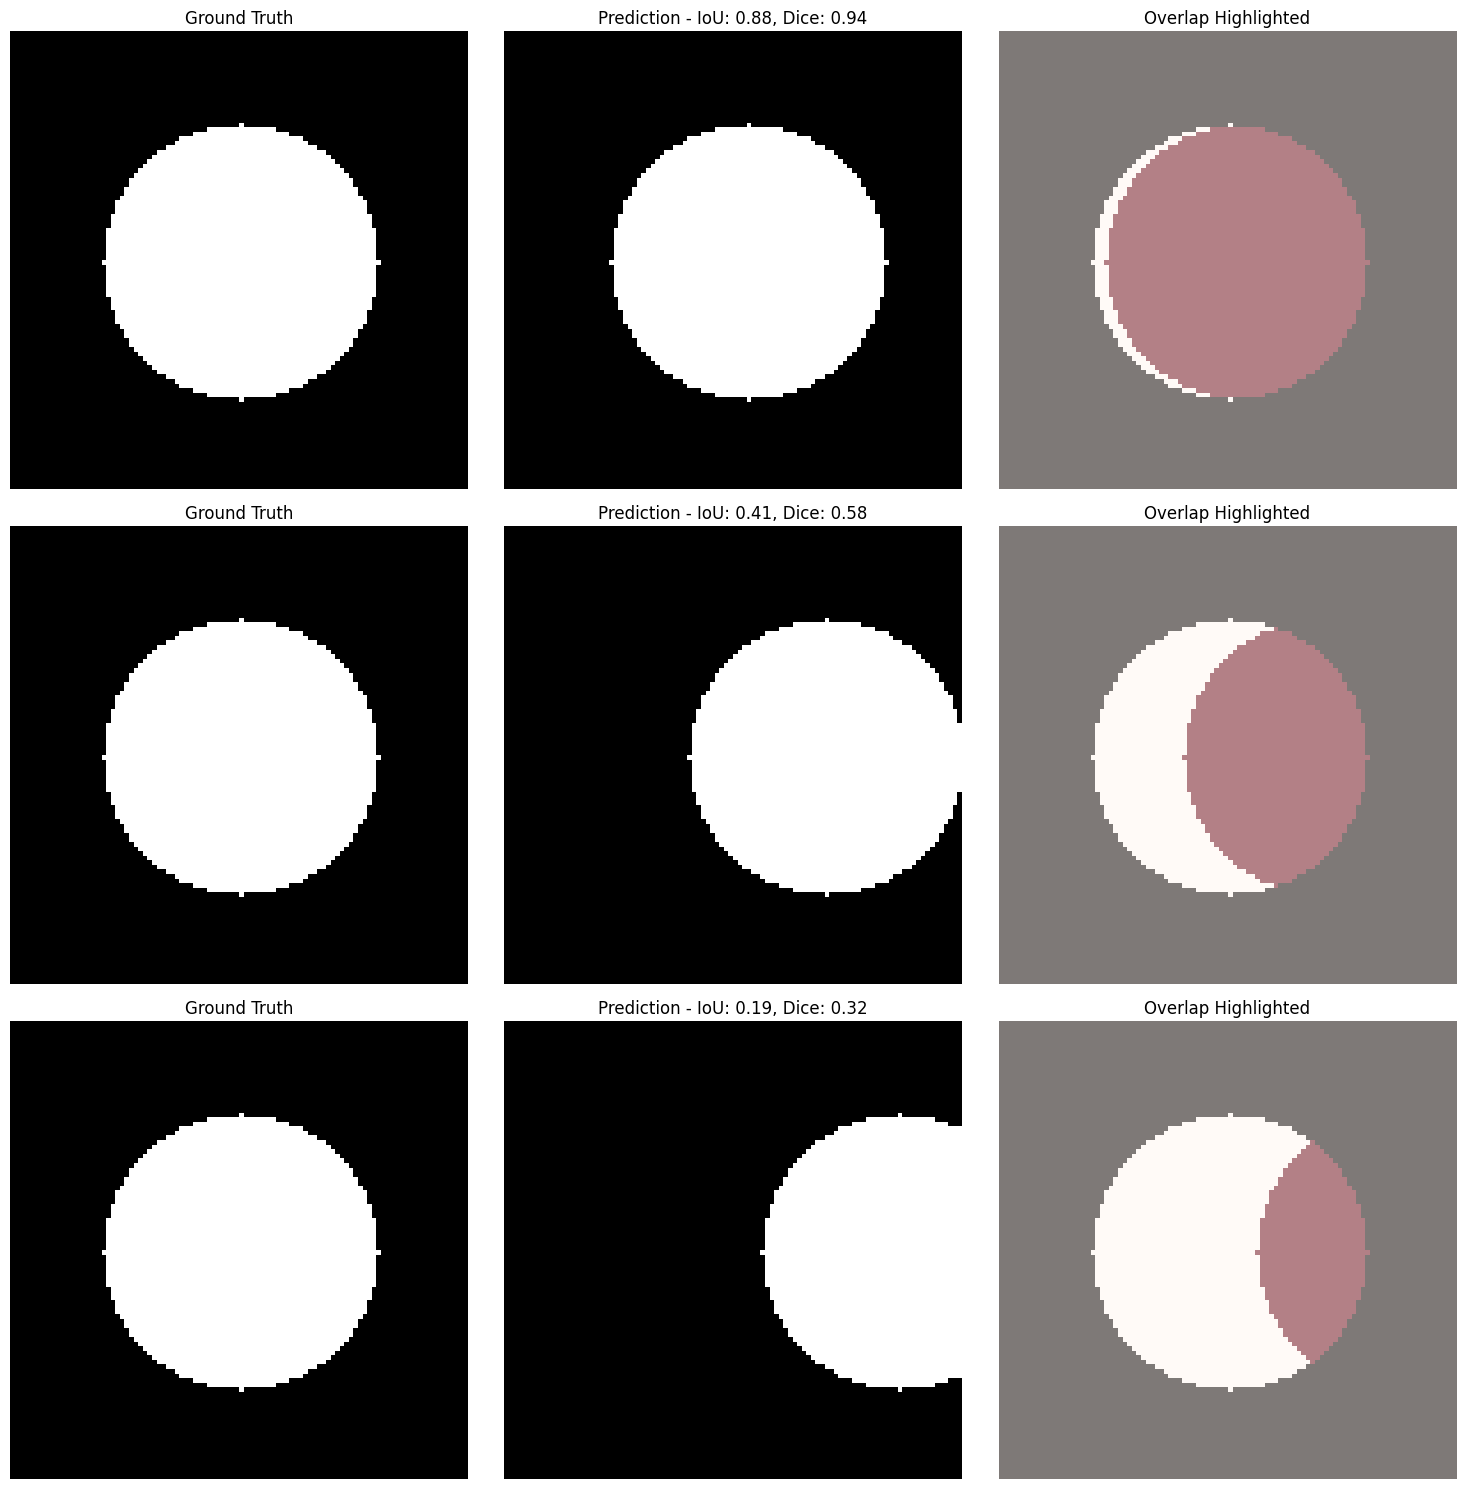

In [7]:
# Generate the ground truth (GT) image: square-shaped with a white circle in the middle
h, w = 100, 100 # height and width of the image
gt_mask = create_circular_mask(h, w, radius=30)

# Generate predicted masks with different overlaps
overlap_ratios = [0.9, 0.5, 0.1]
pred_masks = []

# Adjust the center of the predicted circle to get different overlaps
for overlap in overlap_ratios:
    offset = int((1 - overlap) * 40) # offset for the center to achieve the desired overlap
    pred_mask = create_circular_mask(h, w, center=(50+offset, 50), radius=30)
    pred_masks.append(pred_mask)

# Enhanced visualization with overlap denoted by color
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, pred_mask in enumerate(pred_masks):
    # Compute metrics
    iou_score = IoU(gt_mask, pred_mask)
    dice_score = dice_similarity(gt_mask, pred_mask)

    # Overlap mask
    overlap_mask = np.logical_and(gt_mask, pred_mask)

    # Display ground truth, prediction and overlap
    axs[i, 0].imshow(gt_mask, cmap='gray')
    axs[i, 0].set_title('Ground Truth')
    axs[i, 0].axis('off')  # Turn off axis

    axs[i, 1].imshow(pred_mask, cmap='gray')
    axs[i, 1].set_title(f'Prediction - IoU: {iou_score:.2f}, Dice: {dice_score:.2f}')
    axs[i, 1].axis('off')  # Turn off axis

    axs[i, 2].imshow(gt_mask, cmap='gray')
    axs[i, 2].imshow(overlap_mask, cmap='Reds', alpha=0.5)  # Overlay overlap in red
    axs[i, 2].set_title('Overlap Highlighted')
    axs[i, 2].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()